In [4]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import procrustes
import numpy as np

def resolution_scale(img, points, scale):
    new_points = resolution_scale_points(points, scale)
    new_img = resolution_downscale_img(img, scale)
    return new_img, new_points

def resolution_scale_points(points, scale): 
    return np.around(points*scale)

def resolution_downscale_img(img, scale): 
    x, y = img.shape
    xn = int(x*scale)
    yn = int(y*scale)

    return cv2.resize(img, (yn ,xn)) 

def load_radiograph():
    radiographs = load_radiographs()
    radiograph = radiographs[0]
    return radiograph

def load_tooth(i):
    init = np.load("initial_position.npy")
    return init[0,i,:,:]/0.3

def load_tooth_of_piece():
    tooth = load_tooth(4)
    tooth_of_piece = tooth
    tooth_of_piece[:,0]=tooth[:,0]-1200
    tooth_of_piece[:,1]=tooth[:,1]-700
    return tooth_of_piece

def load_img_piece():
    img = load_radiograph()
    return img[700:1300,1200:1800]

def show_with_points(img, points):
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.imshow(img)
    plt.plot(points[:,0], points[:,1], 'ro', markersize=2)
    plt.show()
    

def load_files(dir_images):
    
    inputList = []
    
    inputNames = glob.glob(dir_images)
    
    for inputName in inputNames:
    
        inputFile = cv2.imread(inputName, 0)
        inputList.append(inputFile)

    return inputList


def load_landmarks():
    
    dir_landmarks = "_Data\Landmarks\original\*.txt"
    inputNames = glob.glob(dir_landmarks)
    
    inputList = np.empty([len(inputNames), 40, 2])
    
    for i, inputName in enumerate(inputNames):
    
        with open(inputName) as f:
            content = f.readlines()
            
        content = [float(x.strip()) for x in content] 
        
        inputList[i] = np.asarray(content).reshape(40,2)
        
    inputList = inputList.reshape(14,8, 40, 2)
        
    return inputList


def load_landmarks_std():
    
    all_landmarks = load_landmarks()
    return total_procrustes_analysis(all_landmarks)

def mean_landmarks(landmarks):
    return np.mean(landmarks,0)
    
def procrustes_analysis(landmarks):
    
    mean = np.mean(landmarks,0)
    landmarks_std = np.empty_like(landmarks)
    
    for i, landmark in enumerate(landmarks):
        
        mean_std, landmark_std, disp = procrustes(mean, landmark)
        landmarks_std[i] = landmark_std
    
    return landmarks_std

def total_procrustes_analysis(all_landmarks):
    #allign shapes in their set
    
    all_landmarks = np.transpose(all_landmarks, (1,0,2,3))
    all_landmarks_std = np.empty_like(all_landmarks)
    
    for i, landmarks in enumerate(all_landmarks):
        
        landmarks_std = procrustes_analysis(landmarks)
        all_landmarks_std[i] = landmarks_std
        
    all_landmarks_std = np.transpose(all_landmarks_std, (1,0,2,3))
    return all_landmarks_std

    
######### Visualization #########

def show(img):

    plt.imshow(img)
    plt.show()
    
def show_tooth_points(landmark, show=True):
    
    plt.plot(landmark[:,0], landmark[:,1], 'ro')
    
    if show:
        plt.show()
        
def show_teeth_points(landmarks):
    
    plt.figure()
    n = len(landmarks)
    hn = int(n/2)
    fig, ax = plt.subplots(figsize=(15, 7))
   
    print('Showing Teeth Landmarks')

    for i, landmark in enumerate(landmarks):
        plt.subplot(2, hn, i+1)
        if(i!=hn):
            plt.xticks(())
            plt.yticks(())   
        plt.plot(landmark[:,0], landmark[:,1], 'ro')
     
    plt.show()
    
    
def load_radiographs():
    dir_radiographs = "_Data\Radiographs\*.tif"
    return load_files(dir_radiographs)


def load_segmentations():
    dir_segmentations = "_Data\Segmentations\*.png"
    return load_files(dir_segmentations)

Showing Teeth Landmarks


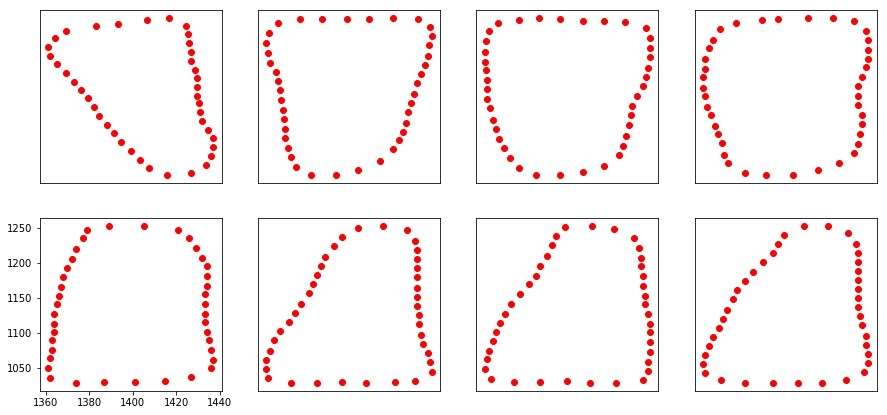

Showing Teeth Landmarks


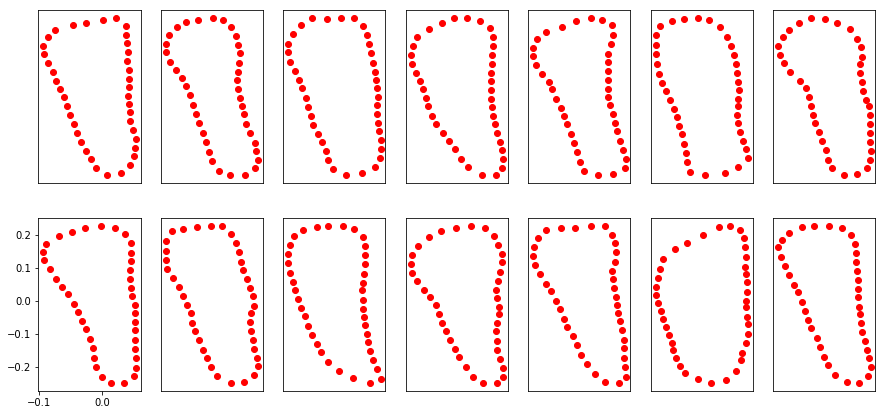

Showing Teeth Landmarks


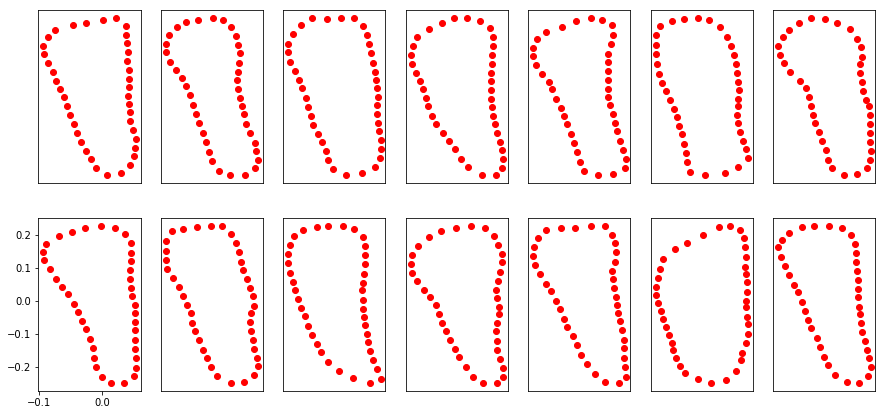

In [5]:
if __name__ == "__main__":
    #main

    dir_radiographs = "_Data\Radiographs\*.tif"
    radiographs = load_files(dir_radiographs)

    dir_segmentations = "_Data\Segmentations\*.png"
    segmentations = load_files(dir_segmentations)

    all_landmarks = load_landmarks()
    show_teeth_points(all_landmarks[0])
    
    all_landmarks_std = total_procrustes_analysis(all_landmarks)
    show_teeth_points(all_landmarks_std[:,0])
    
    all_landmarks_std = load_landmarks_std()
    show_teeth_points(all_landmarks_std[:,0])